In [1]:
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15})
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import yfinance as yf
import datetime
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
# Plot Style
plt.rcParams.update({'font.size': 15})

## Honda Stock Overview Plot

In [3]:
start_date = '2020-01-01'
end_date = '2021-12-31'
df0=yf.download('HMC',start_date,end_date)
df = yf.download("HMC", start_date , end_date)['Close']
df_rtn = np.log(df).diff().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Date
2020-01-02    28.639999
2020-01-03    28.129999
2020-01-06    28.049999
2020-01-07    28.209999
2020-01-08    28.129999
Name: Close, dtype: float64

In [5]:
df.isnull().sum()

0

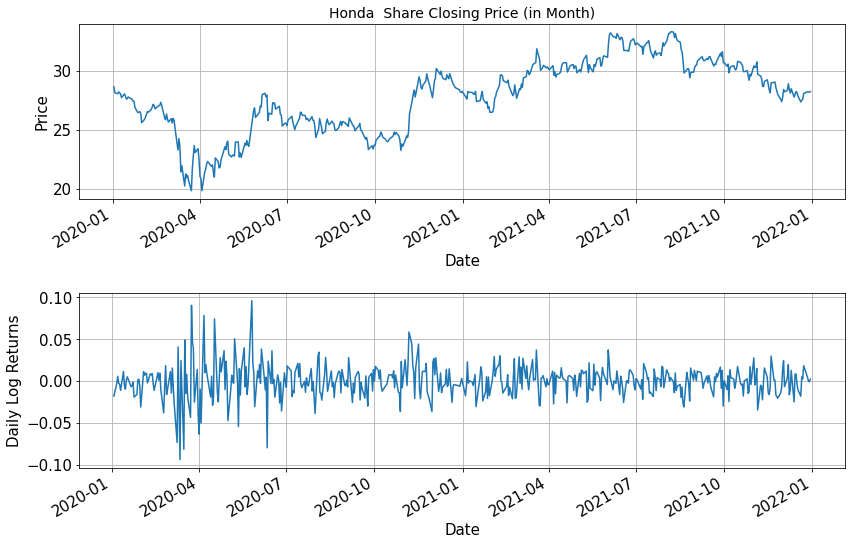

In [6]:
plt.figure(figsize=(12,8))

plt.subplot(2,1, 1)
df.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Honda  Share Closing Price (in Month)", fontsize = 14)
plt.subplot(2,1, 2)
df_rtn.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Log Returns")
plt.savefig("Honda_stationary")

In [7]:
# split the dataset into trainset and test set
X_train=df[:404]
X_test=df[403:]

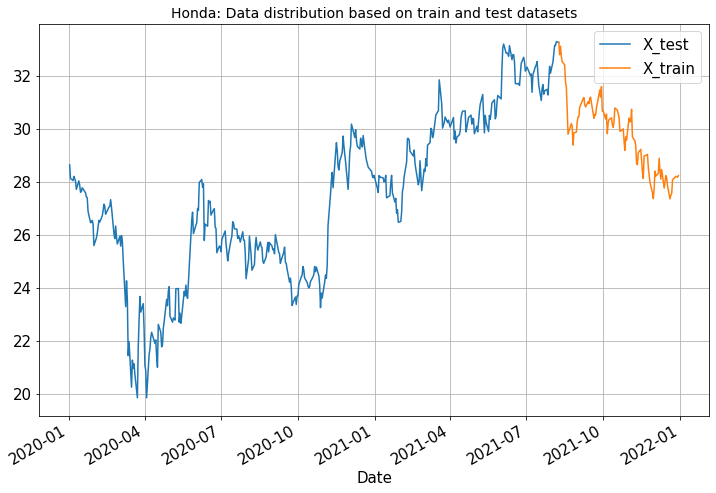

In [8]:
# data distribution based on train and test datasets
plt.figure(figsize=(12,8))

ax=X_train.plot(grid=True,figsize=(12,8));
plt.title("Honda: Data distribution based on train and test datasets", fontsize = 14)
X_test.plot(ax=ax,grid=True);
plt.legend(['X_test','X_train']);
plt.show();


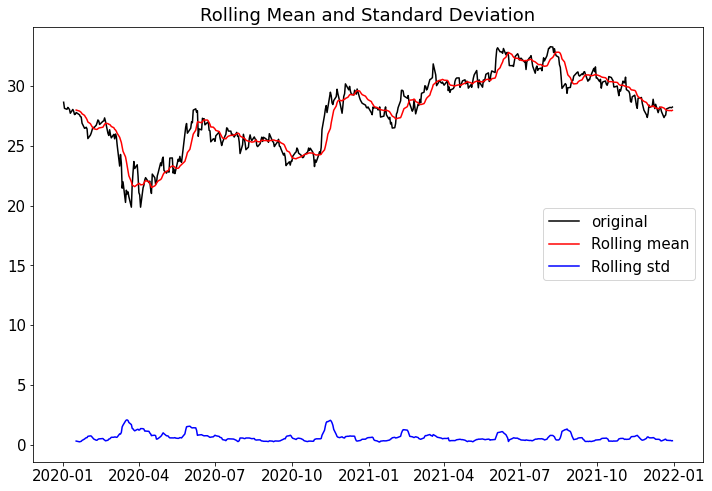

Results of Dickey-fuller test:
Test Statistic             -1.871288
p-value                     0.345686
#lags used                  0.000000
Number of Observations    503.000000
Critical Value(1%)         -3.443418
Critical Value(5%)         -2.867303
Critical Value(10%)        -2.569840
dtype: float64


In [9]:
# define function for ADF test
def adf_test_stationary(timeseries):
    # determine rolling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    #plot rolling statistcs
    plt.figure(figsize=(12,8))
    plt.plot(timeseries,color='black',label='original')
    plt.plot(rolmean,color='red',label='Rolling mean')
    plt.plot(rolstd,color='blue',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #Dickey-fuller test
    print('Results of Dickey-fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','Number of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)
    
#apply adf test on the series
adf_test_stationary(df)

<Figure size 1440x1080 with 0 Axes>

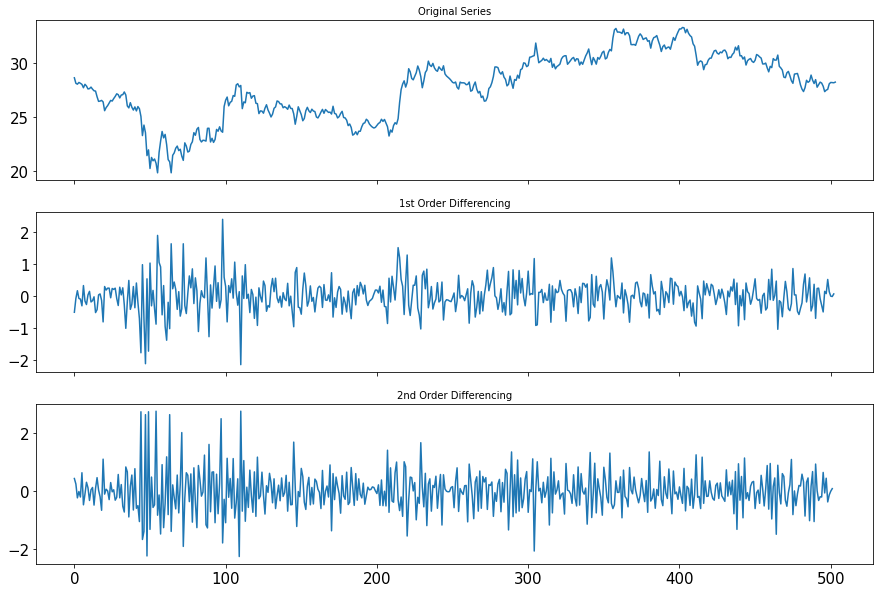

In [10]:
# Original Series
plt.figure(figsize=(20,15))

fig, axes = plt.subplots(3,figsize=(15,10), sharex=True)
axes[0].plot(df[:].values); axes[0].set_title('Original Series',fontsize=10)


# 1st Differencing
axes[1].plot(df[:].diff().dropna().values); axes[1].set_title('1st Order Differencing',fontsize=10)

# 2nd Differencing
axes[2].plot(df[:].diff().diff().dropna().values); axes[2].set_title('2nd Order Differencing',fontsize=10)


plt.show()

In [11]:
p_value0=adfuller(df[:].dropna().values)[1]
p_value0

0.34568645727084224

In [12]:
p_value1=adfuller(df[:].diff().dropna().values)[1]
p_value1

0.0

In [13]:
p_value2=adfuller(df[:].diff().diff().dropna().values)[1]
p_value2

3.773434379051023e-15

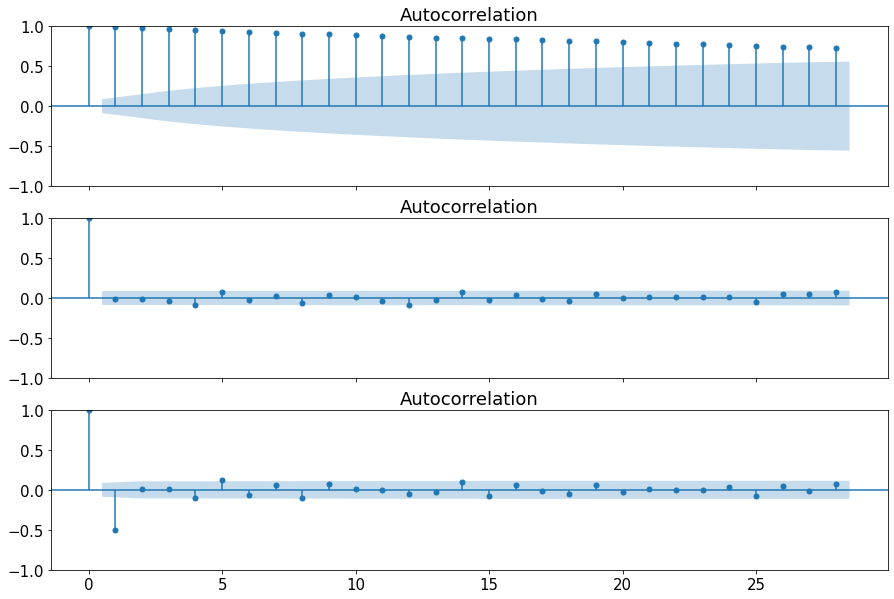

In [14]:
fig, axes = plt.subplots(3,figsize=(15,10), sharex=True)
sm.graphics.tsa.plot_acf(df.values, axes[0])
sm.graphics.tsa.plot_acf(df[:].diff().dropna().values, ax=axes[1])
sm.graphics.tsa.plot_acf(df[:].diff().diff().dropna().values, ax=axes[2])

plt.show()

In [15]:
def plot_diagnosticsTight2(data, rtn, title1 = 'Honda'):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=15)
    axes[0].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(data,lags=25,zero=True, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=15)
    axes[1].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(rtn,lags=25,zero=True, ax = axes[1], title= 'ACF Log Returns '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)

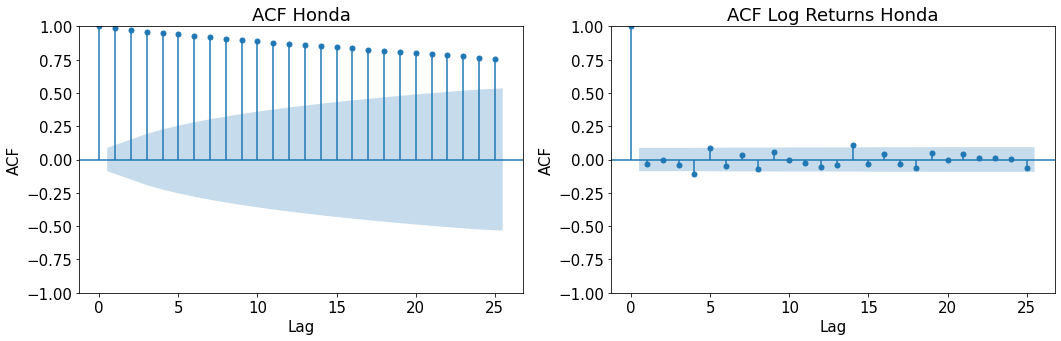

In [16]:
plot_diagnosticsTight2(df, df_rtn)

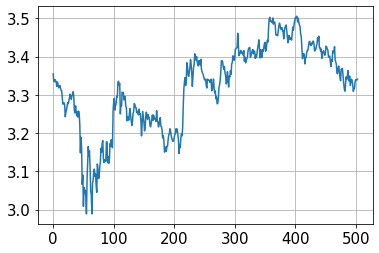

In [17]:
logdf=np.log(df)
logdf.head()

plt.plot(logdf.values)
plt.grid()
plt.show()

C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


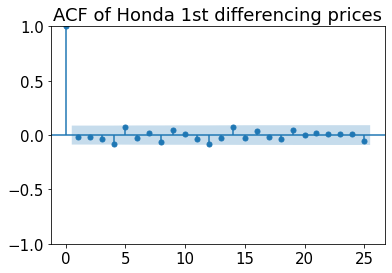

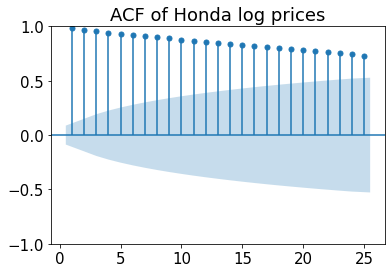

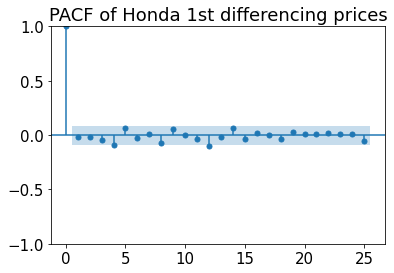

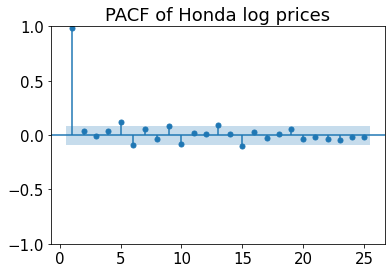

In [18]:
plot_acf(df[:].diff().dropna().values,lags = 25)
plt.title('ACF of Honda 1st differencing prices')
plot_acf(logdf.values, lags = 25, zero=False)
plt.title('ACF of Honda log prices')
plot_pacf(df[:].diff().dropna().values,lags = 25)
plt.title('PACF of Honda 1st differencing prices')
plot_pacf(logdf.values, lags = 25, zero=False)
plt.title('PACF of Honda log prices')
plt.show()

## Tesla Stock Overwiew Plot

In [19]:
def plot_diagnosticsTight2(data, rtn, title1 = 'Tesla'):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=15)
    axes[0].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(data,lags=25,zero=True, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=15)
    axes[1].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(rtn,lags=25,zero=True, ax = axes[1], title= 'ACF Log Returns '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)

In [20]:
start_date = '2020-01-01'
end_date = '2021-12-31'

df2 = yf.download("TSLA", start_date , end_date)['Close']
df2_rtn = np.log(df2).diff().dropna()

[*********************100%***********************]  1 of 1 completed


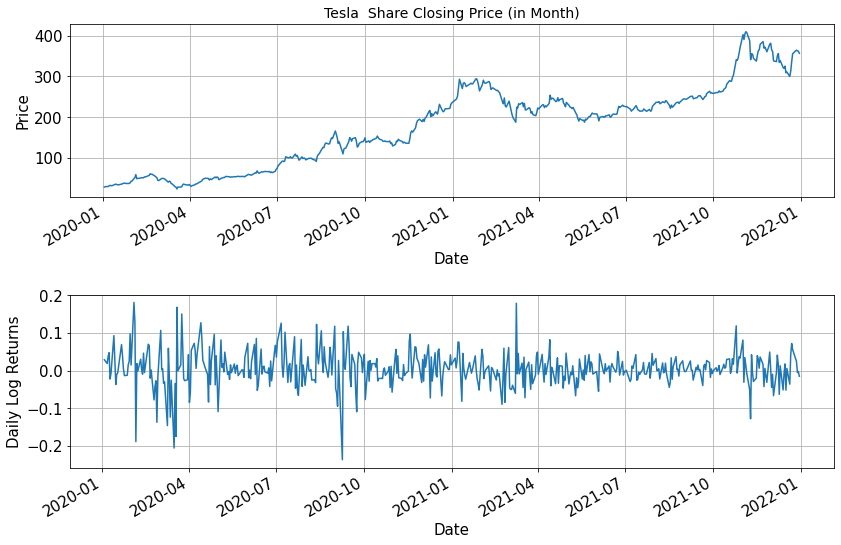

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(2,1, 1)
df2.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Tesla  Share Closing Price (in Month)", fontsize = 14)

plt.subplot(2,1, 2)
df2_rtn.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Log Returns")
plt.savefig("Tesla_stationary")

In [22]:
# split the dataset into trainset and test set
X_train_T=df2[:404]
X_test_T=df2[404:]

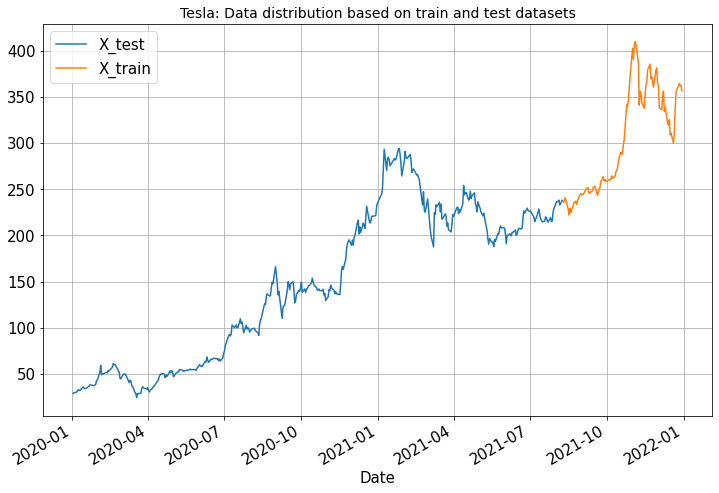

In [23]:
# data distribution based on train and test datasets
plt.figure(figsize=(12,8))

ax_T=X_train_T.plot(grid=True,figsize=(12,8));
plt.title("Tesla: Data distribution based on train and test datasets", fontsize = 14)
X_test_T.plot(ax=ax_T,grid=True);
plt.legend(['X_test','X_train']);
plt.show();

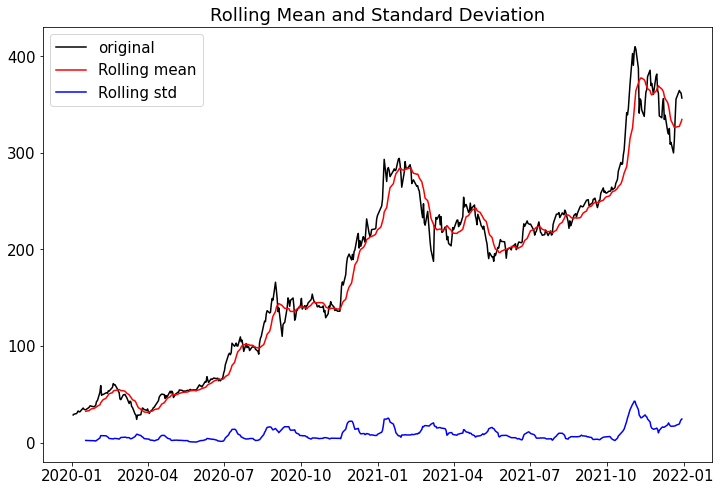

Results of Dickey-fuller test:
Test Statistic             -0.579100
p-value                     0.875635
#lags used                  0.000000
Number of Observations    503.000000
Critical Value(1%)         -3.443418
Critical Value(5%)         -2.867303
Critical Value(10%)        -2.569840
dtype: float64


In [24]:
# define function for ADF test
def adf_test_stationary(timeseries):
    # determine rolling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    #plot rolling statistcs
    plt.figure(figsize=(12,8))
    plt.plot(timeseries,color='black',label='original')
    plt.plot(rolmean,color='red',label='Rolling mean')
    plt.plot(rolstd,color='blue',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #Dickey-fuller test
    print('Results of Dickey-fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','Number of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)
    
#apply adf test on the series
adf_test_stationary(df2)

<Figure size 1440x1080 with 0 Axes>

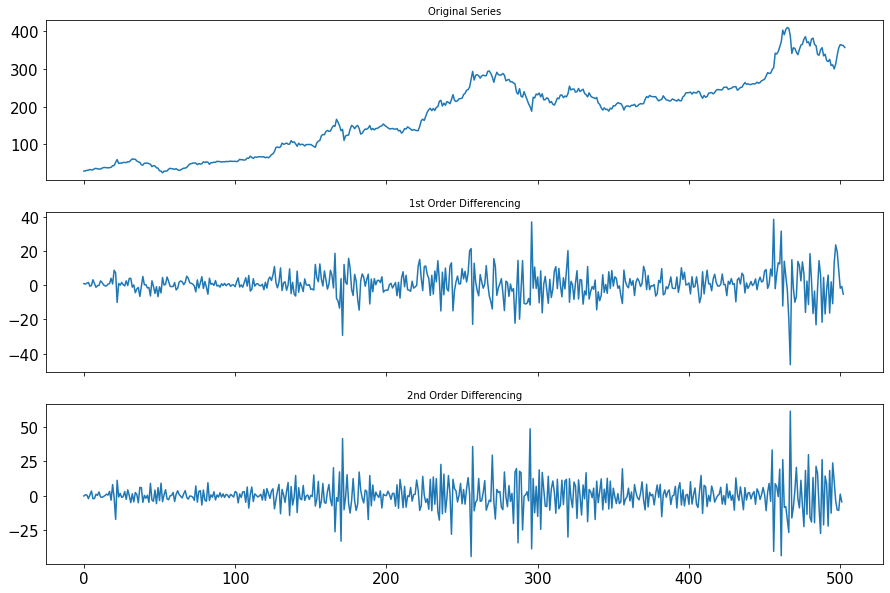

In [25]:
# Original Series
plt.figure(figsize=(20,15))

fig, axes = plt.subplots(3,figsize=(15,10), sharex=True)
axes[0].plot(df2[:].values); axes[0].set_title('Original Series',fontsize=10)


# 1st Differencing
axes[1].plot(df2[:].diff().dropna().values); axes[1].set_title('1st Order Differencing',fontsize=10)

# 2nd Differencing
axes[2].plot(df2[:].diff().diff().dropna().values); axes[2].set_title('2nd Order Differencing',fontsize=10)


plt.show()

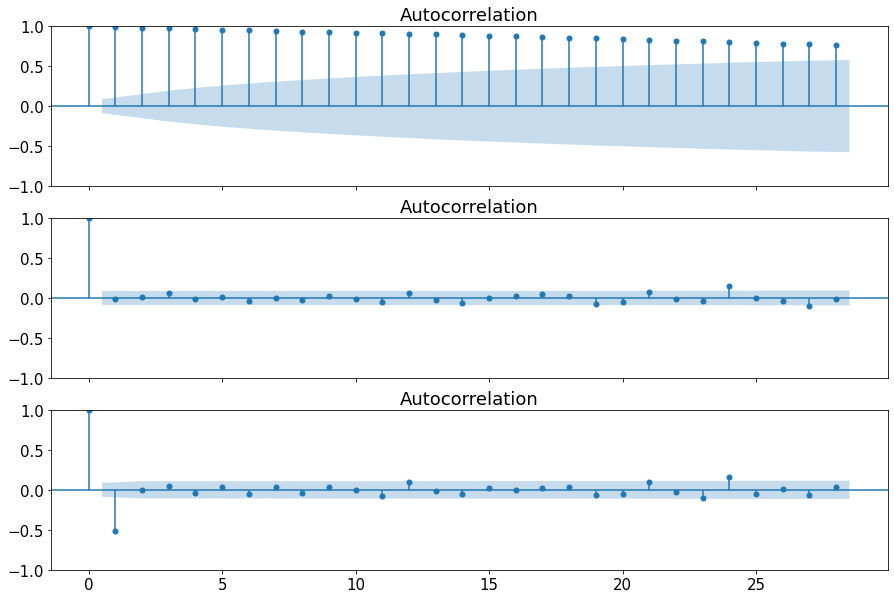

In [26]:
fig, axes = plt.subplots(3,figsize=(15,10), sharex=True)
sm.graphics.tsa.plot_acf(df2[:].values, axes[0])
sm.graphics.tsa.plot_acf(df2[:].diff().dropna().values, ax=axes[1])
sm.graphics.tsa.plot_acf(df2[:].diff().diff().dropna().values, ax=axes[2])

plt.show()

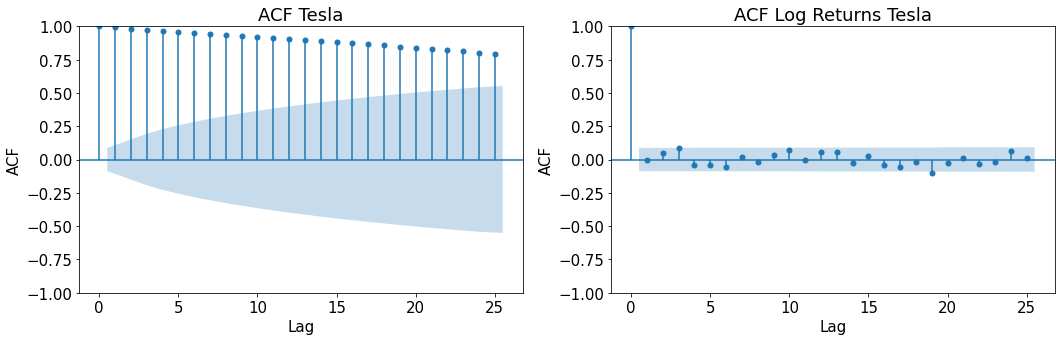

In [27]:
plot_diagnosticsTight2(df2, df2_rtn)

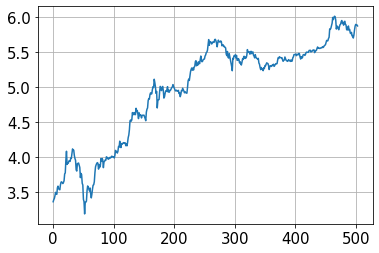

In [28]:
logdf2=np.log(df2)
plt.plot(logdf2.values)
plt.grid()
plt.show()

C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


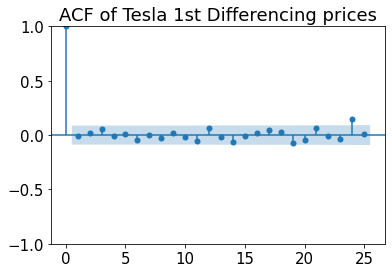

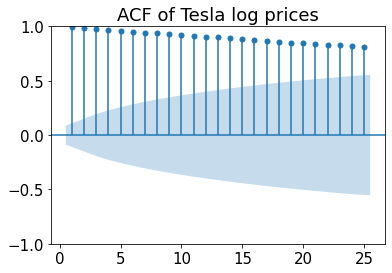

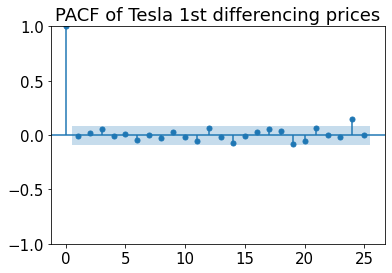

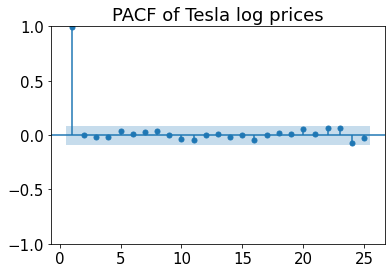

In [29]:
plot_acf(df2[:].diff().dropna().values,lags = 25)
plt.title('ACF of Tesla 1st Differencing prices')
plot_acf(logdf2.values, lags = 25, zero=False)
plt.title('ACF of Tesla log prices')
plot_pacf(df2[:].diff().dropna().values,lags = 25)
plt.title('PACF of Tesla 1st differencing prices')
plot_pacf(logdf2.values, lags = 25, zero=False)
plt.title('PACF of Tesla log prices')
plt.show()

# ARIMA Model prediction

## ARIMA---Honda Stock ---ADF test 

In [30]:
Honda_pr=np.array(df.reset_index()['Close'])

In [31]:
Honda_diff=df[:].diff().dropna().values
Honda_pr_log = np.log(Honda_pr)
Honda_pr_log_diff = Honda_pr_log[1:] - Honda_pr_log[:-1]

In [32]:
Honda_pr_diff = Honda_pr[1:] - Honda_pr[:-1]

In [33]:
Honda_pr_diff

array([-0.51000023, -0.07999992,  0.15999985, -0.07999992, -0.09999847,
       -0.31000137,  0.3200016 , -0.16000175, -0.26999855,  0.02999878,
        0.1400013 , -0.19000053, -0.14999962, -0.03000069, -0.52000046,
       -0.43000031,  0.03000069,  0.05999947, -0.13999939, -0.80999947,
        0.28999901,  0.18000031,  0.23999977,  0.23999977, -0.05999947,
        0.22999954,  0.20000076,  0.23999977, -0.07999992, -0.29999924,
        0.26999855,  0.03000069,  0.25      , -0.28000069, -1.00999832,
       -0.18000031,  0.47999954, -0.42000008, -0.26000023,  0.29000092,
       -0.37000084,  0.39999962, -0.19999886, -0.71000099, -1.77000046,
        0.97000122, -0.71000099, -2.1099987 ,  0.52999878, -1.71999931,
        1.02000046, -0.31000137,  0.17000008, -0.39999962, -0.87999916,
        1.87999916,  1.04000092,  0.89999962, -0.59000015,  0.31999969,
       -0.95000076, -1.37999916, -0.20000076, -1.01999855,  1.61999893,
        0.22000122,  0.4299984 ,  0.20000076, -0.42000008,  0.13

In [34]:
#original data ADF test
resulta = adfuller(Honda_pr)
print('ADF Statistic for Honda stock: %f' % resulta[0])
print('p-value for Honda stock: %f' % resulta[1])
for key, value in resulta[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Honda stock: -1.871288
p-value for Honda stock: 0.345686
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [35]:
# log data ADF test
resultc = adfuller(Honda_pr_log)
print('ADF Statistic: %f' % resultc[0])
print('p-value: %f' % resultc[1])
for key, value in resultc[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.764752
p-value: 0.398096
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [36]:
# log difference data ADF
resultd = adfuller(Honda_pr_log_diff)
print('ADF Statistic: %f' % resultd[0])
print('p-value: %f' % resultd[1])
for key, value in resultd[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.289091
p-value: 0.000000
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [37]:
# Define a very simple function to searhch for models - will have to be flexible, given that
# Python arch_model does not take as mean the ARMA model, but only ARX model...
# When possible, will choose simpler models.
def searchARMA(data, exog, max_p, max_q):
 
    aic = np.zeros((max_p,max_q))
    bic = np.zeros((max_p,max_q))
    for i in range(max_p):
        for j in range(max_q):
            #try:
            if(len(exog) == len(data)):
                    #print('1')
                model = sm.tsa.arima.ARIMA(data,order=(i,1,j)) 
                
            else:
                model =sm.tsa.arima.ARIMA(data,order=(i,1,j))
            res = model.fit()
               
            aic[i,j] = res.aic
            bic[i,j] = res.bic
               
            print('p:',i,' q:', j,' aic:', aic[i,j], ' bic:', bic[i,j])
           
    

In [38]:
n=len(Honda_pr_log_diff)
exog = np.ones(n)
searchARMA(Honda_pr_log_diff, exog, max_p=6, max_q =6)

p: 0  q: 0  aic: -2161.4333566374803  bic: -2157.2147565177884
p: 0  q: 1  aic: -2518.533645431737  bic: -2510.0964451923537


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 0  q: 2  aic: -2517.117944509655  bic: -2504.4621441505797
p: 0  q: 3  aic: -2515.119349050533  bic: -2498.244948571766


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 0  q: 4  aic: -2514.4786511928605  bic: -2493.385650594402


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 0  q: 5  aic: -2516.5644909396915  bic: -2491.2528902215413
p: 1  q: 0  aic: -2315.33395829206  bic: -2306.8967580526764
p: 1  q: 1  aic: -2517.1170692135447  bic: -2504.4612688544694
p: 1  q: 2  aic: -2516.1881866979534  bic: -2499.3137862191866


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 1  q: 3  aic: -2516.845203114893  bic: -2495.7522025164344


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 1  q: 4  aic: -2513.34582370458  bic: -2488.03422298643


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 1  q: 5  aic: -2518.0475630752526  bic: -2488.5173622374105
p: 2  q: 0  aic: -2364.9409587498985  bic: -2352.285158390823


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2  q: 1  aic: -2515.1085884375725  bic: -2498.2341879588057


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2  q: 2  aic: -2516.354805194769  bic: -2495.2618045963104
p: 2  q: 3  aic: -2522.0769316759015  bic: -2496.7653309577513
p: 2  q: 4  aic: -2520.578671970269  bic: -2491.048471132427


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2  q: 5  aic: -2519.473693882225  bic: -2485.7248929246907
p: 3  q: 0  aic: -2381.5629907614775  bic: -2364.6885902827107


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3  q: 1  aic: -2513.9540136039122  bic: -2492.8610130054535
p: 3  q: 2  aic: -2516.087003655709  bic: -2490.7754029375587
p: 3  q: 3  aic: -2520.6386709779927  bic: -2491.1084701401505


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3  q: 4  aic: -2514.4106575717146  bic: -2480.6618566141806


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3  q: 5  aic: -2508.6512672943954  bic: -2470.68386621717
p: 4  q: 0  aic: -2431.2198577252193  bic: -2410.1268571267606


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4  q: 1  aic: -2517.2270972508113  bic: -2491.915496532661


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4  q: 2  aic: -2519.4382619482676  bic: -2489.9080611104255


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4  q: 3  aic: -2519.6665206062053  bic: -2485.9177196486717


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4  q: 4  aic: -2513.3241431320794  bic: -2475.356742054854


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4  q: 5  aic: -2522.638029092277  bic: -2480.4520278953596
p: 5  q: 0  aic: -2438.6273832454035  bic: -2413.3157825272533


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 5  q: 1  aic: -2518.827372430234  bic: -2489.297171592392


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 5  q: 2  aic: -2519.7653387330174  bic: -2486.016537775484


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 5  q: 3  aic: -2519.3882951955047  bic: -2481.420894118279


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 5  q: 4  aic: -2513.4765117286834  bic: -2471.290510531766
p: 5  q: 5  aic: -2518.7703951422686  bic: -2472.3657938256597


C:\Users\ruoha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# model difference-Honda 1,1,1

In [39]:

model = sm.tsa.arima.ARIMA(Honda_pr_diff, order=(1,1,1))
ARMA_res_H= model.fit()
print(ARMA_res_H.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  503
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -366.895
Date:                Sun, 11 Dec 2022   AIC                            739.791
Time:                        23:22:02   BIC                            752.447
Sample:                             0   HQIC                           744.756
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0166      0.036     -0.459      0.646      -0.087       0.054
ma.L1         -1.0000      1.611     -0.621      0.535      -4.157       2.157
sigma2         0.2494      0.401      0.622      0.5

In [40]:
def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
   
    
    
    fig = sm.qqplot(data, line='q', ax = ax4)
    ax4.grid()
    
   
    plt.tight_layout()


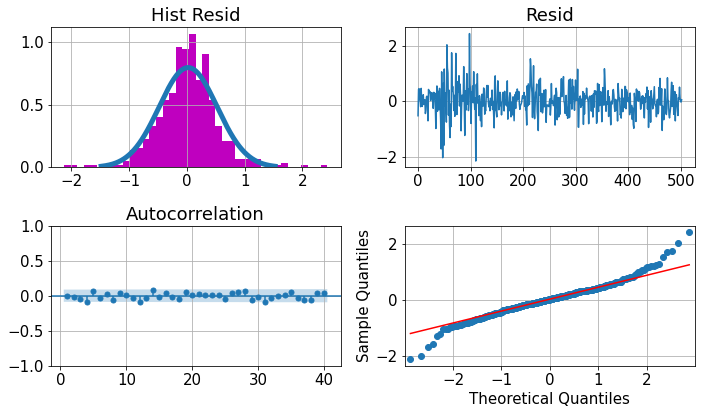

In [41]:
resid_H = ARMA_res_H.resid
plot_diagnosticsTight3(resid_H)

# ### Model with log(price) difference 111

In [42]:
model_hl1= sm.tsa.arima.ARIMA(Honda_pr_log_diff, order=(1,1,1))
ARMA_res11= model_hl1.fit()
print(ARMA_res11.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  503
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1261.559
Date:                Sun, 11 Dec 2022   AIC                          -2517.117
Time:                        23:22:03   BIC                          -2504.461
Sample:                             0   HQIC                         -2512.152
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0341      0.031     -1.109      0.267      -0.094       0.026
ma.L1         -0.9999      0.562     -1.778      0.075      -2.102       0.102
sigma2         0.0004      0.000      1.786      0.0

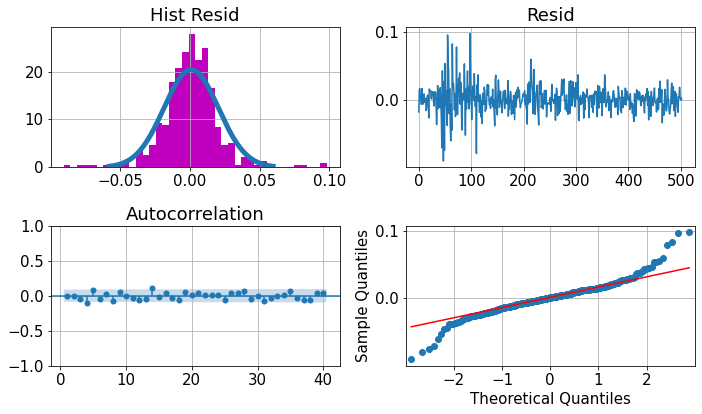

In [43]:
resid_log_H1 = ARMA_res11.resid
plot_diagnosticsTight3(resid_log_H1)

# Prediction

In [44]:
X_train_log=Honda_pr_log_diff[:404]
X_test_log=Honda_pr_log_diff[404:]


In [45]:
model_hlp= sm.tsa.arima.ARIMA(X_train_log, order=(1,1,1))
ARMA_res1p= model_hlp.fit()
print(ARMA_res1p.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  404
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 986.959
Date:                Sun, 11 Dec 2022   AIC                          -1967.918
Time:                        23:22:04   BIC                          -1955.921
Sample:                             0   HQIC                         -1963.169
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0365      0.035     -1.037      0.300      -0.105       0.032
ma.L1         -0.9986      0.046    -21.853      0.000      -1.088      -0.909
sigma2         0.0004   2.47e-05     17.429      0.0

In [46]:
forecast_test = ARMA_res1p.forecast(len(X_test_log))


In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(X_test_log, forecast_test)
mape = mean_absolute_percentage_error(X_test_log, forecast_test)
rmse = np.sqrt(mean_squared_error(X_test_log, forecast_test))

print(f'mae - Honda: {mae}')
print(f'mape - Honda: {mape}')
print(f'rmse - Honda: {rmse}')

mae - Honda: 0.010269960421961433
mape - Honda: 17064946305.765732
rmse - Honda: 0.01317274191885113


In [48]:
mape1=np.mean(np.abs(X_test_log- forecast_test)/np.abs( forecast_test))
mape1

27.25547464356435

In [49]:
mae=np.mean(np.abs(X_test_log- forecast_test))
mae

0.010269960421961433

In [50]:
rmse=np.mean((X_test_log- forecast_test)**2)**0.5
rmse

0.01317274191885113

## ARIMA---Tesla Stock 

### ADF test for Tesla 

In [51]:
Tesla_pr=np.array(df2.reset_index()['Close'])

In [52]:
Tesla_diff=df2[:].diff().dropna().values
Tesla_pr_log = np.log(Tesla_pr)
Tesla_pr_diff = Tesla_pr[1:] - Tesla_pr[:-1]
Tesla_pr_log_diff = Tesla_pr_log[1:] - Tesla_pr_log[:-1]

In [53]:
result0 = adfuller(Tesla_pr)
print('ADF Statistic for Tesla stock: %f' % result0[0])
print('p-value foor Tesla stock: %f' % result0[1])
for key, value in result0[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Tesla stock: -0.579100
p-value foor Tesla stock: 0.875635
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [54]:
result1 = adfuller(Tesla_diff)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.585749
p-value: 0.000000
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [55]:
result2 = adfuller(Tesla_pr_log)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.868356
p-value: 0.347091
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [56]:
result3 = adfuller(Tesla_pr_log_diff)
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
for key, value in result3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.461501
p-value: 0.000000
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [57]:
result4 = adfuller(Tesla_pr_diff)
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])
for key, value in result4[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.585749
p-value: 0.000000
	1%: -3.443
	5%: -2.867
	10%: -2.570


## model  price difference Tesla 1,1,1

In [58]:

model_T = sm.tsa.arima.ARIMA(Tesla_diff, order=(1,1,1))
ARMA_res_T = model_T.fit()
print(ARMA_res_T.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  503
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1735.649
Date:                Sun, 11 Dec 2022   AIC                           3477.298
Time:                        23:22:05   BIC                           3489.954
Sample:                             0   HQIC                          3482.263
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0086      0.031     -0.277      0.782      -0.070       0.052
ma.L1         -1.0000      0.897     -1.115      0.265      -2.757       0.757
sigma2        58.2465     52.628      1.107      0.2

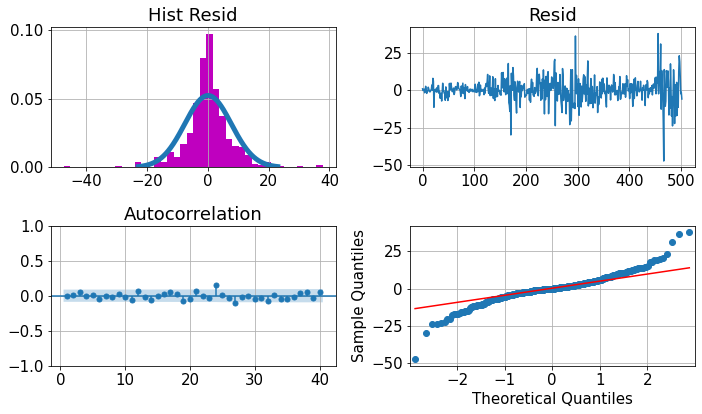

In [59]:
resid_T = ARMA_res_T.resid
plot_diagnosticsTight3(resid_T)

## Model with log(price) difference

In [60]:
model_tl = sm.tsa.arima.ARIMA(Tesla_pr_log_diff, order=(1,1,1))
ARMA_res_tl = model_tl.fit()
print(ARMA_res_tl.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  503
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 821.743
Date:                Sun, 11 Dec 2022   AIC                          -1637.487
Time:                        23:22:06   BIC                          -1624.831
Sample:                             0   HQIC                         -1632.522
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0045      0.035     -0.129      0.897      -0.073       0.064
ma.L1         -0.9974      0.017    -58.506      0.000      -1.031      -0.964
sigma2         0.0022   8.76e-05     25.048      0.0

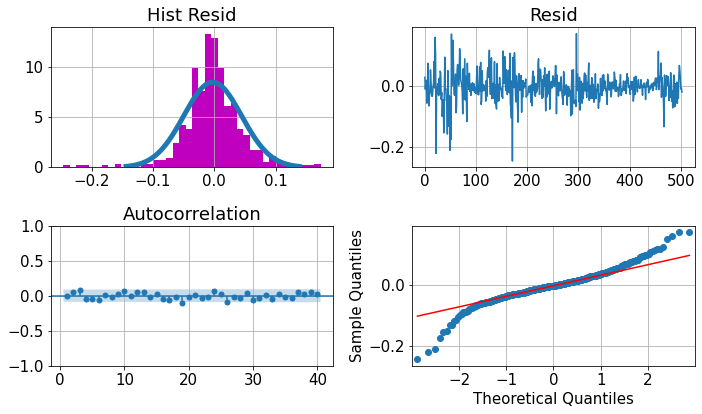

In [61]:
resid_log_T = ARMA_res_tl.resid
plot_diagnosticsTight3(resid_log_T)

# Prediction

In [62]:
X_train_log_T=Tesla_pr_log_diff[:404]
X_test_log_T=Tesla_pr_log_diff[404:]

In [63]:
model_Tp= sm.tsa.arima.ARIMA(X_train_log_T, order=(1,1,1))
ARMA_resTp= model_Tp.fit()
print(ARMA_resTp.summary());

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  404
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 634.943
Date:                Sun, 11 Dec 2022   AIC                          -1263.887
Time:                        23:22:07   BIC                          -1251.890
Sample:                             0   HQIC                         -1259.137
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.041     -0.345      0.730      -0.094       0.066
ma.L1         -0.9949      0.017    -59.225      0.000      -1.028      -0.962
sigma2         0.0025      0.000     22.123      0.0

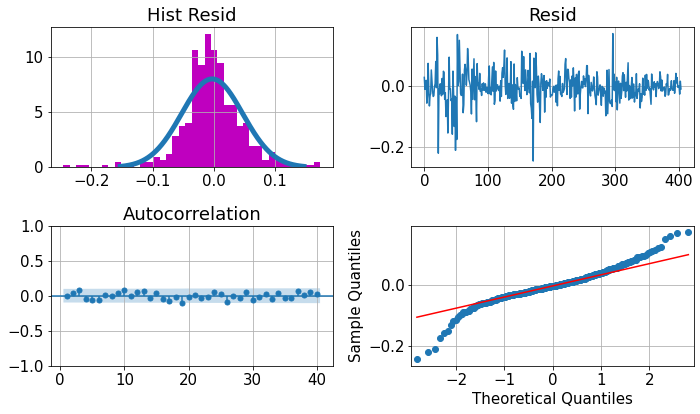

In [64]:
resid_log_Tp = ARMA_resTp.resid
plot_diagnosticsTight3(resid_log_Tp)

In [65]:
forecast_test_T = ARMA_resTp.forecast(len(X_test_log_T))
forecast_test_T

array([0.00391417, 0.00378425, 0.00378608, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378606,
       0.00378606, 0.00378606, 0.00378606, 0.00378606, 0.00378

In [66]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(X_test_log_T, forecast_test_T)
mape = mean_absolute_percentage_error(X_test_log_T, forecast_test_T)
rmse = np.sqrt(mean_squared_error(X_test_log_T, forecast_test_T))

print(f'mae - Tesla: {mae}')
print(f'mape - Tesla: {mape}')
print(f'rmse - Tesla: {rmse}')

mae - Tesla: 0.022557776951615482
mape - Tesla: 1.168016187267177
rmse - Tesla: 0.032338684660414695
